# Introducción, objetivos y contenido
====================================================================================================================================

# Importación de librerías
====================================================================================================================================

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import glob

# Carga de datos
====================================================================================================================================

## Datos de Google

In [20]:
# Data de reviews en LA
data_la = pd.read_csv("../Data/Exploración/Google/revgoo_LA.csv")

In [2]:
# Datos de todos los negocios
archivos_negocios = glob.glob("../Data/Exploración/Google/metadata-sitios/*.json")
data_negocios = pd.concat((pd.read_json(archivo,lines=True) for archivo in archivos_negocios))

In [21]:
# Datos de restaurantes
data_restaurantes = pd.read_parquet("../Data/Exploración/Google/goo_rest.parquet")

In [3]:
# Datos de los restaurantes y bares en LA
restaurantes_LA = pd.read_parquet("../Data/Exploración/Google/restaurantes_LA.parquet")

In [33]:
# Datos de reviews de restaurantes en LA
reviews_restaurantes = pd.read_parquet("../Data/Exploración/Google/reviews_restaurantes_la.parquet")

# Check

In [4]:
data_la.head(3)

,user_id,name,time,rating,text,pics,resp,gmap_id,state
0,1.038949e+20,Stacey Harmson,1462600014123,5,NaN,NaN,NaN,0x862f1241e22b8c47:0x10a9c8ec2c19c498,LA
1,1.033068e+20,Amber Driggers,1536862454240,3,NaN,NaN,NaN,0x862f1241e22b8c47:0x10a9c8ec2c19c498,LA
2,1.015649e+20,Melinda Crum,1530129171037,5,NaN,NaN,NaN,0x862f1241e22b8c47:0x10a9c8ec2c19c498,LA


In [6]:
data_negocios.head(3)

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.35710,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.21529,[Textile exporter],4.5,6,None,None,None,Open now,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.29213,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...


In [5]:
# Se guarda la data de los negocios anidada en un parquet.
data_negocios.to_parquet("../Data/Exploración/Google/goo_sites_total.parquet")

In [25]:
restaurantes_LA.head(3)

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
661,Taqueria El Patron,"Taqueria El Patron, 2104 N University Ave, Laf...",0x86249bbdbe4d888b:0xaffd4b84921e2561,None,30.260098,-92.040551,"[Mexican restaurant, Restaurant]",4.2,48,$,"[[Thursday, 10AM–7PM], [Friday, 10AM–7PM], [Sa...","{'Accessibility': None, 'Activities': None, 'A...",Permanently closed,"[0x86249ea34cff2803:0x5339ea0b37d8ad01, 0x8624...",https://www.google.com/maps/place//data=!4m2!3...
2406,Shell,"Shell, 78478 Lee Rd, LA-437, Covington, LA 70435",0x862766d53bd426b5:0x76fcecc115b36ce,None,30.575775,-90.075427,"[Gas station, ATM, Convenience store, Restaurant]",3.7,26,$$,None,{'Accessibility': ['Wheelchair accessible entr...,None,"[0x862766d52e5418f3:0xff8b0f5b3d2c9743, 0x8627...",https://www.google.com/maps/place//data=!4m2!3...
2416,Shell,"Shell, 82358 Orange St, LA-25, Folsom, LA 70437",0x86276ed7fa92c22f:0xf94fde832100c839,None,30.630458,-90.187520,"[Gas station, ATM, Convenience store, Restaurant]",4.4,17,$$,None,{'Accessibility': ['Wheelchair accessible entr...,None,"[0x86276ed7e084498b:0x264ce0798ca5c4a0, 0x8627...",https://www.google.com/maps/place//data=!4m2!3...


In [34]:
reviews_restaurantes.head(3)

,user_id,name,time,rating,text,pics,resp,gmap_id,state,year
450021,1.136650e+20,toby pennington,2019-01-25 00:41:38.084,4,Great food ordered tacos to go was not disappo...,[{'url': ['https://lh5.googleusercontent.com/p...,None,0x86249bbdbe4d888b:0xaffd4b84921e2561,LA,2019
450022,1.094796e+20,Gina Harrison,2019-01-24 23:28:26.135,5,I had the lunch special which h they have mone...,None,None,0x86249bbdbe4d888b:0xaffd4b84921e2561,LA,2019
450023,1.090262e+20,Lidice Ortiz,2017-08-18 05:45:58.149,4,Best tacos and tortas in town. There are not p...,None,None,0x86249bbdbe4d888b:0xaffd4b84921e2561,LA,2017


# Exploración
====================================================================================================================================

## Reseñas negocios LA

In [26]:
# Se explora la base de datos inicial.
data_la.head()

,user_id,name,time,rating,text,pics,resp,gmap_id,state
0,1.038949e+20,Stacey Harmson,1462600014123,5,NaN,NaN,NaN,0x862f1241e22b8c47:0x10a9c8ec2c19c498,LA
1,1.033068e+20,Amber Driggers,1536862454240,3,NaN,NaN,NaN,0x862f1241e22b8c47:0x10a9c8ec2c19c498,LA
2,1.015649e+20,Melinda Crum,1530129171037,5,NaN,NaN,NaN,0x862f1241e22b8c47:0x10a9c8ec2c19c498,LA
3,1.000166e+20,Michael French,1506908737423,5,NaN,NaN,NaN,0x862f1241e22b8c47:0x10a9c8ec2c19c498,LA
4,1.008682e+20,Dewayne Mann,1550354659667,5,NaN,NaN,NaN,0x862f1241e22b8c47:0x10a9c8ec2c19c498,LA


In [27]:
# Se explora el número de registros de reviews que tenemos.
(print(f"total de reviews: {data_la["user_id"].count()}"))
# Se explora el número de usuarios únicos que hay.
(print(f"total de usuarios unicos: {len(data_la["user_id"].unique())}"))
# Se explora el número de restaurantes únicos que hay.
(print(f"Total de restaurantes unicos: {len(data_la["gmap_id"].unique())}"))

total de reviews: 1500000
total de usuarios unicos: 138469
Total de restaurantes unicos: 25857


In [28]:
# Se transforma el tiempo a formato de fecha
data_la["time"] = pd.to_datetime(data_la["time"],unit="ms")
data_la.head(3)

,user_id,name,time,rating,text,pics,resp,gmap_id,state
0,1.038949e+20,Stacey Harmson,2016-05-07 05:46:54.123,5,NaN,NaN,NaN,0x862f1241e22b8c47:0x10a9c8ec2c19c498,LA
1,1.033068e+20,Amber Driggers,2018-09-13 18:14:14.240,3,NaN,NaN,NaN,0x862f1241e22b8c47:0x10a9c8ec2c19c498,LA
2,1.015649e+20,Melinda Crum,2018-06-27 19:52:51.037,5,NaN,NaN,NaN,0x862f1241e22b8c47:0x10a9c8ec2c19c498,LA


In [29]:
# Se observan los periodos de tiempo (en años) con los que se cuenta y la composición para cada uno de ellos.
data_la["year"] = data_la["time"].dt.year
data_la.groupby("year")["user_id"].count()

year
2001         2
2006         5
2007         2
2008        16
2009        20
2010       141
2011       684
2012      1005
2013      1349
2014      1725
2015      6388
2016     42181
2017    186253
2018    363616
2019    477932
2020    276842
2021    141839
Name: user_id, dtype: int64

In [30]:
# Se obtienen las reviews de negocios que sean restaurantes.
reviews_rest = data_la[data_la["gmap_id"].isin(restaurantes_LA["gmap_id"])]
reviews_rest.head(3)

,user_id,name,time,rating,text,pics,resp,gmap_id,state,year
450021,1.136650e+20,toby pennington,2019-01-25 00:41:38.084,4,Great food ordered tacos to go was not disappo...,[{'url': ['https://lh5.googleusercontent.com/p...,NaN,0x86249bbdbe4d888b:0xaffd4b84921e2561,LA,2019
450022,1.094796e+20,Gina Harrison,2019-01-24 23:28:26.135,5,I had the lunch special which h they have mone...,NaN,NaN,0x86249bbdbe4d888b:0xaffd4b84921e2561,LA,2019
450023,1.090262e+20,Lidice Ortiz,2017-08-18 05:45:58.149,4,Best tacos and tortas in town. There are not p...,NaN,NaN,0x86249bbdbe4d888b:0xaffd4b84921e2561,LA,2017


In [31]:
# Guardamos los restaurantes detectados con reviews
reviews_rest.to_parquet("../Data/Exploración/Google/reviews_restaurantes_la.parquet")

## Reviews restaurantes

In [35]:
reviews_restaurantes.head(3)

,user_id,name,time,rating,text,pics,resp,gmap_id,state,year
450021,1.136650e+20,toby pennington,2019-01-25 00:41:38.084,4,Great food ordered tacos to go was not disappo...,[{'url': ['https://lh5.googleusercontent.com/p...,None,0x86249bbdbe4d888b:0xaffd4b84921e2561,LA,2019
450022,1.094796e+20,Gina Harrison,2019-01-24 23:28:26.135,5,I had the lunch special which h they have mone...,None,None,0x86249bbdbe4d888b:0xaffd4b84921e2561,LA,2019
450023,1.090262e+20,Lidice Ortiz,2017-08-18 05:45:58.149,4,Best tacos and tortas in town. There are not p...,None,None,0x86249bbdbe4d888b:0xaffd4b84921e2561,LA,2017


In [36]:
reviews_restaurantes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180776 entries, 450021 to 1209905
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   user_id  180776 non-null  float64       
 1   name     180776 non-null  object        
 2   time     180776 non-null  datetime64[ns]
 3   rating   180776 non-null  int64         
 4   text     101266 non-null  object        
 5   pics     6222 non-null    object        
 6   resp     19504 non-null   object        
 7   gmap_id  180776 non-null  object        
 8   state    180776 non-null  object        
 9   year     180776 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(6)
memory usage: 14.5+ MB


In [37]:
# Se observan cuántos usuarios únicos hay.
print(f"Número único de usuarios: {len(reviews_restaurantes["user_id"].unique())}")
# Se observan cuántos restaurantes cuentan con reviews.
print(f"Número de restaurantes con review: {len(reviews_restaurantes["gmap_id"].unique())}")

Número único de usuarios: 82476
Número de restaurantes con review: 2688


In [38]:
# Se observa el periodo de tiempo en el que se cuentan reviews.
reviews_restaurantes.groupby("year")["user_id"].count()

year
2001        1
2006        1
2008        4
2009        2
2010       41
2011      160
2012      217
2013      249
2014      269
2015      932
2016     6057
2017    22016
2018    44873
2019    58675
2020    29402
2021    17877
Name: user_id, dtype: int64

<Axes: xlabel='year', ylabel='Count'>

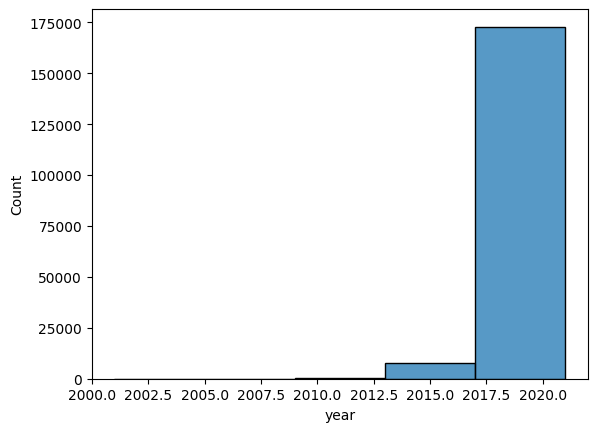

In [39]:
# Se observa la distribución de los datos en un histograma
sns.histplot(reviews_restaurantes,x="year",bins=5)

<Axes: xlabel='rating', ylabel='Count'>

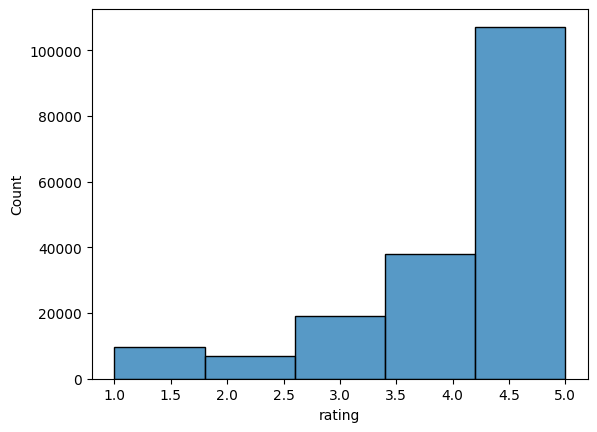

In [40]:
# Se observa la distribución de los datos por rating.
sns.histplot(reviews_restaurantes,x="rating",bins=5)

## Negocios

In [7]:
# Se observa la data inicial del dataset de restaurantes.
data_negocios.head(3)

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.35710,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.21529,[Textile exporter],4.5,6,None,None,None,Open now,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.29213,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...


In [8]:
# Se obtiene la categoría de los negocios.
negocios_cat = data_negocios[["gmap_id","category"]].dropna()
# Se separan las categorías de los negocios
negocios_cat = negocios_cat.explode("category")
negocios_cat.head()

,gmap_id,category
0,0x88f16e41928ff687:0x883dad4fd048e8f8,Pharmacy
1,0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,Textile exporter
2,0x80c2c778e3b73d33:0xbdc58662a4a97d49,Korean restaurant
3,0x80c2c89923b27a41:0x32041559418d447,Fabric store
4,0x80c2c632f933b073:0xc31785961fe826a6,Fabric store


In [9]:
# Se observa la distribución de las categorías.
negocios_cat["category"].value_counts(normalize=True).head(15)

category
Restaurant               0.015530
Auto repair shop         0.012431
Gas station              0.011200
Service establishment    0.010615
Beauty salon             0.010493
Convenience store        0.009926
Church                   0.008474
Hair salon               0.008266
Nail salon               0.007121
ATM                      0.006779
Park                     0.006772
Doctor                   0.005855
Clothing store           0.005823
Dentist                  0.005770
Insurance agency         0.005697
Name: proportion, dtype: float64

In [10]:
# Se obtienen los id de los negocios cuyas categorías incluyan restaurantes o bares.
id_rest = negocios_cat[negocios_cat["category"].str.contains('restaurant|bar', case=False)]
id_rest.head(10)

,gmap_id,category
2,0x80c2c778e3b73d33:0xbdc58662a4a97d49,Korean restaurant
6,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,Restaurant
8,0x87ec235c54d25b31:0x3b75fb5facc602f,Health food restaurant
68,0x89c6c89efcaed69d:0xded973f6033e7dba,Restaurant
75,0x87fd0e70c5f5d87b:0xdf340eeb75040ef3,Bar
87,0x88e711bd2244fe3b:0x8406dd780f0574d1,Barber shop
96,0x7c00456eecad3111:0x8217f9600c51f33,Restaurant
111,0x89a911d03136ef51:0xb1c06825101afe51,Barber shop
114,0x88db4147b1d9e6f3:0x943dbd10a92ba1b1,Restaurant
115,0x88c2e4e34f1ed783:0x76c5da381c499d79,Buffet restaurant


In [12]:
# Se observan los elementos que contienen "bar" dentro de su categoría para identificar aquellos que no corresponden o pertenecen a la categoría de negocios que se espera.
id_rest[id_rest["category"].str.contains("bar",case=False)]["category"].unique()

array(['Bar', 'Barber shop', 'Cocktail bar', 'Bar & grill', 'Sports bar',
       'Wine bar', 'Bark supplier', 'Barbecue restaurant', 'Snack bar',
       'Barber supply store', 'Gay bar', 'Espresso bar', 'Eyebrow bar',
       'Hookah bar', 'Karaoke bar', 'Barn', 'Bartending school',
       'Oyster bar restaurant', 'Poke bar', 'Tapas bar', 'Barber school',
       'Piano bar', 'Subaru dealer', 'Barrister', 'Bar stool supplier',
       'Dart bar', 'Live music bar', 'Korean barbecue restaurant',
       'Cider bar', 'Mongolian barbecue restaurant', 'Cabaret club',
       'Barbecue area', 'Hyperbaric medicine physician',
       'Bar restaurant furniture store', 'Barrel supplier',
       'Bariatric surgeon', 'Bar PMU', 'Salsa bar', 'Military barracks',
       'Tiki bar', 'Stand bar', 'Bar tabac', 'Army barracks',
       'Offal barbecue restaurant', 'Cured ham bar', 'Girl bar',
       'Mutton barbecue restaurant'], dtype=object)

In [14]:
# Se crea una lista con los elementos que no pertenecen a la categoría de negocios esperada.
no = ['Barber shop', 'Bark supplier',
       'Barber supply store', 'Eyebrow bar',
       'Hookah bar', 'Bartending school',
       'Barber school', 'Subaru dealer', 'Barrister', 'Bar stool supplier',
       'Cabaret club', 'Barbecue area', 'Hyperbaric medicine physician',
       'Bar restaurant furniture store', 'Barrel supplier',
       'Bariatric surgeon', 'Military barracks', 'Army barracks']

In [15]:
# Se filtra nuevamente el dataset de las categorías para obtener únicamente las categorías de los negocios deseadas
id_rest_final = id_rest[~id_rest["category"].isin(no)]
id_rest_final.head(5)

,gmap_id,category
2,0x80c2c778e3b73d33:0xbdc58662a4a97d49,Korean restaurant
6,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,Restaurant
8,0x87ec235c54d25b31:0x3b75fb5facc602f,Health food restaurant
68,0x89c6c89efcaed69d:0xded973f6033e7dba,Restaurant
75,0x87fd0e70c5f5d87b:0xdf340eeb75040ef3,Bar


In [17]:
# Se observa que las categorías de negocios se encuentren dentro de lo esperado (bares y restaurantes).
id_rest_final["category"].unique()

array(['Korean restaurant', 'Restaurant', 'Health food restaurant', 'Bar',
       'Buffet restaurant', 'Cocktail bar', 'Fast food restaurant',
       'Family restaurant', 'Seafood restaurant', 'Dominican restaurant',
       'Taco restaurant', 'Mexican restaurant', 'Restaurant or cafe',
       'Bar & grill', 'Breakfast restaurant', 'Lunch restaurant',
       'Asian restaurant', 'Hot pot restaurant', 'Chinese restaurant',
       'Mediterranean restaurant', 'Takeout Restaurant', 'Sports bar',
       'Italian restaurant', 'Wine bar', 'Ramen restaurant',
       'American restaurant', 'Modern French restaurant',
       'Pizza restaurant', 'Vegetarian restaurant', 'Delivery Restaurant',
       'Sushi restaurant', 'Japanese restaurant', 'Creole restaurant',
       'Caribbean restaurant', 'Barbecue restaurant', 'Snack bar',
       'Hamburger restaurant', 'Soul food restaurant',
       'Burrito restaurant', 'Gay bar', 'Latin American restaurant',
       'Spanish restaurant', 'Cheesesteak restaur

In [18]:
# Se filtra el data de los negocios para obtener aquellos que son de negocios de restaurantes o bares.
data_restaurantes = data_negocios[data_negocios["gmap_id"].isin(id_rest_final["gmap_id"])]
data_restaurantes.head(10)

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
6,Vons Chicken,"Vons Chicken, 12740 La Mirada Blvd, La Mirada,...",0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,None,33.916402,-118.010855,[Restaurant],4.5,18,None,"[[Thursday, 11AM–9:30PM], [Friday, 11AM–9:30PM...","{'Service options': ['Outdoor seating', 'Curbs...",Open ⋅ Closes 9:30PM,None,https://www.google.com/maps/place//data=!4m2!3...
8,"Sweet Rewards Gluten Free Bakery, LLC","Sweet Rewards Gluten Free Bakery, LLC, 85 NE D...",0x87ec235c54d25b31:0x3b75fb5facc602f,None,41.616079,-93.865487,"[Bakery, Health food restaurant]",4.7,21,None,"[[Thursday, 10AM–5:30PM], [Friday, 10AM–5:30PM...",{'Service options': ['Delivery']},Permanently closed,"[0x87ee974869295555:0x95f310d065882c9b, 0x87ec...",https://www.google.com/maps/place//data=!4m2!3...
68,Vivi Bubble Tea,"Vivi Bubble Tea, 701 S 5th St, Philadelphia, P...",0x89c6c89efcaed69d:0xded973f6033e7dba,"Bubble tea shop offering hot & cold versions, ...",39.940293,-75.150923,[Restaurant],4.0,8,None,None,"{'Service options': ['Delivery'], 'Amenities':...",None,"[0x89c6c62a40f4b733:0x73bfeec1898f272b, 0x89c6...",https://www.google.com/maps/place//data=!4m2!3...
75,The Bar Stool,"The Bar Stool, 618 Main St, Highland, WI 53543",0x87fd0e70c5f5d87b:0xdf340eeb75040ef3,None,43.046428,-90.380139,[Bar],4.5,18,None,None,"{'Service options': ['Dine-in', 'Delivery'], '...",None,"[0x87fd0e70dc5eeb3d:0x7f3ce1daba0a5f24, 0x87fd...",https://www.google.com/maps/place//data=!4m2!3...
96,Hale Pops,"Hale Pops, 55-370 Kamehameha Hwy, Laie, HI 96762",0x7c00456eecad3111:0x8217f9600c51f33,None,21.637796,-157.920714,[Restaurant],4.4,18,None,"[[Thursday, 11AM–8PM], [Friday, 11AM–8PM], [Sa...","{'Service options': ['Outdoor seating', 'Takeo...",Closed ⋅ Opens 11AM,"[0x7c00451360f80cf1:0x930291a38bab3132, 0x7c00...",https://www.google.com/maps/place//data=!4m2!3...
114,Cape Seafood Shack,"Cape Seafood Shack, 603 Del Prado Blvd S, Cape...",0x88db4147b1d9e6f3:0x943dbd10a92ba1b1,None,26.641377,-81.940545,[Restaurant],5.0,1,$$,None,"{'Service options': ['Dine-in', 'Delivery'], '...",None,None,https://www.google.com/maps/place//data=!4m2!3...
115,Fresh Point Country Buffet,"Fresh Point Country Buffet, 10525 US-19, Pinel...",0x88c2e4e34f1ed783:0x76c5da381c499d79,None,27.867489,-82.702971,[Buffet restaurant],5.0,2,None,"[[Thursday, 11AM–9PM], [Friday, 11AM–9PM], [Sa...","{'Service options': ['Delivery'], 'Accessibili...",Permanently closed,"[0x88c2e5593fbd022b:0x2ccd7a719849c9f7, 0x88c2...",https://www.google.com/maps/place//data=!4m2!3...
123,Golden Castle,"Golden Castle, 1906 E 12th St, Austin, TX 78702",0x8644b59b8fe872e5:0x5e638876caa84cc3,None,30.273985,-97.719563,[Restaurant],4.5,8,None,"[[Thursday, 5PM–12AM], [Friday, 5PM–12AM], [Sa...","{'Service options': ['Delivery', 'Takeout', 'D...",Closed ⋅ Opens 5PM,None,https://www.google.com/maps/place//data=!4m2!3...
126,Onyx Bar,"Onyx Bar, 11011 W Charleston Blvd, Las Vegas, ...",0x80c8be4e73e8263f:0x3edb275a351e6266,None,36.156205,-115.332636,[Cocktail bar],4.7,8,None,"[[Thursday, 4–11PM], [Friday, 4PM–1AM], [Satur...","{'Service options': ['Dine-in', 'Delivery'], '...",Closed ⋅ Opens 4PM,"[0x80c8be531e3b3471:0xb681abb0b8d07596, 0x80c8...",https://www.google.com/maps/place//data=!4m2!3...


In [19]:
# Se guarda la base de restaurantes y bares.
data_restaurantes.to_parquet("../Data/Exploración/Google/goo_rest.parquet")

In [22]:
# Se extraen los restaurantes que están en LA
restaurantes_la = data_restaurantes[data_restaurantes["gmap_id"].isin(data_la["gmap_id"])]
restaurantes_la.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
661,Taqueria El Patron,"Taqueria El Patron, 2104 N University Ave, Laf...",0x86249bbdbe4d888b:0xaffd4b84921e2561,None,30.260098,-92.040551,"[Mexican restaurant, Restaurant]",4.2,48,$,"[[Thursday, 10AM–7PM], [Friday, 10AM–7PM], [Sa...","{'Accessibility': None, 'Activities': None, 'A...",Permanently closed,"[0x86249ea34cff2803:0x5339ea0b37d8ad01, 0x8624...",https://www.google.com/maps/place//data=!4m2!3...
2406,Shell,"Shell, 78478 Lee Rd, LA-437, Covington, LA 70435",0x862766d53bd426b5:0x76fcecc115b36ce,None,30.575775,-90.075427,"[Gas station, ATM, Convenience store, Restaurant]",3.7,26,$$,None,{'Accessibility': ['Wheelchair accessible entr...,None,"[0x862766d52e5418f3:0xff8b0f5b3d2c9743, 0x8627...",https://www.google.com/maps/place//data=!4m2!3...
2416,Shell,"Shell, 82358 Orange St, LA-25, Folsom, LA 70437",0x86276ed7fa92c22f:0xf94fde832100c839,None,30.630458,-90.187520,"[Gas station, ATM, Convenience store, Restaurant]",4.4,17,$$,None,{'Accessibility': ['Wheelchair accessible entr...,None,"[0x86276ed7e084498b:0x264ce0798ca5c4a0, 0x8627...",https://www.google.com/maps/place//data=!4m2!3...
10994,Los Amigos,"Los Amigos, 1600 N Hwy 190, Covington, LA 70433",0x86275df04c08a451:0xea1a2bb5c6a8900,None,30.453364,-90.081345,[Mexican restaurant],4.2,18,None,"[[Wednesday, 11AM–9PM], [Thursday, 11AM–9PM], ...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 9PM,None,https://www.google.com/maps/place//data=!4m2!3...
11360,Chasers Bar and Grill,"Chasers Bar and Grill, 829 University Dr, Lake...",0x863b8797660dadb3:0xd6bef48f51bdf451,None,30.168373,-93.232105,[Bar & grill],4.4,8,None,None,{'Accessibility': ['Wheelchair accessible entr...,None,None,https://www.google.com/maps/place//data=!4m2!3...


In [23]:
# Guardamos los datos filtrados.
restaurantes_la.to_parquet("../Data/Exploración/Google/restaurantes_LA.parquet")

## Restaurantes LA

In [4]:
restaurantes_LA.head(3)

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
661,Taqueria El Patron,"Taqueria El Patron, 2104 N University Ave, Laf...",0x86249bbdbe4d888b:0xaffd4b84921e2561,None,30.260098,-92.040551,"[Mexican restaurant, Restaurant]",4.2,48,$,"[[Thursday, 10AM–7PM], [Friday, 10AM–7PM], [Sa...","{'Accessibility': None, 'Activities': None, 'A...",Permanently closed,"[0x86249ea34cff2803:0x5339ea0b37d8ad01, 0x8624...",https://www.google.com/maps/place//data=!4m2!3...
2406,Shell,"Shell, 78478 Lee Rd, LA-437, Covington, LA 70435",0x862766d53bd426b5:0x76fcecc115b36ce,None,30.575775,-90.075427,"[Gas station, ATM, Convenience store, Restaurant]",3.7,26,$$,None,{'Accessibility': ['Wheelchair accessible entr...,None,"[0x862766d52e5418f3:0xff8b0f5b3d2c9743, 0x8627...",https://www.google.com/maps/place//data=!4m2!3...
2416,Shell,"Shell, 82358 Orange St, LA-25, Folsom, LA 70437",0x86276ed7fa92c22f:0xf94fde832100c839,None,30.630458,-90.187520,"[Gas station, ATM, Convenience store, Restaurant]",4.4,17,$$,None,{'Accessibility': ['Wheelchair accessible entr...,None,"[0x86276ed7e084498b:0x264ce0798ca5c4a0, 0x8627...",https://www.google.com/maps/place//data=!4m2!3...


In [42]:
# Se observa la información del dataset 
restaurantes_LA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2703 entries, 661 to 274864
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              2703 non-null   object 
 1   address           2702 non-null   object 
 2   gmap_id           2703 non-null   object 
 3   description       891 non-null    object 
 4   latitude          2703 non-null   float64
 5   longitude         2703 non-null   float64
 6   category          2703 non-null   object 
 7   avg_rating        2703 non-null   float64
 8   num_of_reviews    2703 non-null   int64  
 9   price             1457 non-null   object 
 10  hours             2489 non-null   object 
 11  MISC              2695 non-null   object 
 12  state             2510 non-null   object 
 13  relative_results  2454 non-null   object 
 14  url               2703 non-null   object 
dtypes: float64(3), int64(1), object(11)
memory usage: 337.9+ KB


In [43]:
# Se observan la composición de los estados de los restaurantes en el dataset
restaurantes_LA["state"].value_counts(normalize=True)

state
Permanently closed                     0.191633
Closed ⋅ Opens 11AM                    0.095618
Open ⋅ Closes 9PM                      0.058167
Closed ⋅ Opens 10AM                    0.045418
Open ⋅ Closes 10PM                     0.041833
                                         ...   
Closes soon ⋅ 8PM ⋅ Opens 9AM Tue      0.000398
Closes soon ⋅ 12AM ⋅ Opens 12PM Tue    0.000398
Closes soon ⋅ 1AM ⋅ Reopens 6AM        0.000398
Open ⋅ Closes 3AM ⋅ Reopens 10AM       0.000398
Closed ⋅ Opens 10PM                    0.000398
Name: proportion, Length: 248, dtype: float64

<Axes: xlabel='avg_rating', ylabel='Count'>

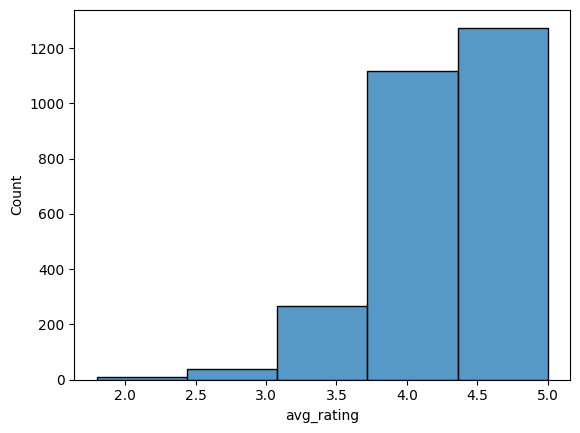

In [44]:
# Se observa la distribución de los promedios de rating. 
sns.histplot(restaurantes_LA,x="avg_rating",bins=5)

In [45]:
# Se observa la distribución de categorías de los restaurantes de LA
categorias = restaurantes_LA[["gmap_id","category"]].explode("category")
categorias["category"].value_counts(normalize=True).head(20)

category
Restaurant                  0.158398
Fast food restaurant        0.070980
Bar                         0.067842
Takeout Restaurant          0.056635
Sandwich shop               0.044082
Caterer                     0.041243
Seafood restaurant          0.028093
Pizza restaurant            0.027346
American restaurant         0.024208
Mexican restaurant          0.020771
Breakfast restaurant        0.017633
Delivery Restaurant         0.016587
Bar & grill                 0.014794
Cocktail bar                0.014495
Pizza delivery              0.014047
Hamburger restaurant        0.013748
Cajun restaurant            0.013449
Chinese restaurant          0.012851
Chicken wings restaurant    0.012702
Coffee shop                 0.010161
Name: proportion, dtype: float64

In [5]:
# Se extraen los datos de MISC de cada negocio 
misc_restaurantes = restaurantes_LA[["gmap_id","MISC"]]

# Se obtiene un dataframe con los datos normalizados de "MISC"
x = pd.json_normalize(misc_restaurantes["MISC"])

#Se concatenan los dos dataframes.
misc_restaurantes = pd.concat([misc_restaurantes.reset_index(drop=True), x.reset_index(drop=True)], axis=1)

# Se elimina la columna "MISC"
misc_restaurantes.drop(columns=["MISC"],inplace=True)

# Se visualiza el resultado.
misc_restaurantes.head(5)


,gmap_id,Accessibility,Activities,Amenities,Atmosphere,Crowd,Dining options,From the business,Health & safety,Health and safety,Highlights,Offerings,Payments,Planning,Popular for,Recycling,Service options
0,0x86249bbdbe4d888b:0xaffd4b84921e2561,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,NaN,[Delivery]
1,0x862766d53bd426b5:0x76fcecc115b36ce,[Wheelchair accessible entrance],NaN,[Restroom],None,None,None,None,None,None,None,None,None,None,None,NaN,None
2,0x86276ed7fa92c22f:0xf94fde832100c839,[Wheelchair accessible entrance],NaN,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None
3,0x86275df04c08a451:0xea1a2bb5c6a8900,[Wheelchair accessible entrance],NaN,[Good for kids],[Casual],[Groups],None,None,None,None,None,"[Comfort food, Kids' menu, Quick bite, Small p...",None,None,"[Lunch, Dinner, Solo dining]",NaN,"[Takeout, Dine-in, Delivery]"
4,0x863b8797660dadb3:0xd6bef48f51bdf451,[Wheelchair accessible entrance],NaN,[Restroom],[Casual],[Groups],None,None,None,None,[Fast service],"[Alcohol, Comfort food, Food, Food at bar, Qui...",None,None,"[Lunch, Dinner, Solo dining]",NaN,"[Takeout, Dine-in, Delivery]"


In [6]:
# Se observa la distribución de restaurante por el tipo de atmósfera.
atmosphere = misc_restaurantes[["gmap_id","Atmosphere"]]
atmosphere = atmosphere.explode("Atmosphere")

atmosphere["Atmosphere"].value_counts(normalize=True)

Atmosphere
Casual      0.644056
Cozy        0.293821
Cosy        0.021491
Historic    0.014439
Romantic    0.011081
Upscale     0.005709
Quiet       0.004365
Upmarket    0.002686
Trending    0.002351
Name: proportion, dtype: float64

In [7]:
# Se observa la distribución de restaurantes por las "Dining options".
options = misc_restaurantes[["gmap_id","Dining options"]]
options = options.explode("Dining options")
options["Dining options"].value_counts(normalize=True)

Dining options
Dessert                 0.334187
Lunch                   0.203641
Dinner                  0.144482
Catering                0.125142
Seating                 0.106940
Breakfast               0.056030
Outside food allowed    0.028726
Counter service         0.000853
Name: proportion, dtype: float64

In [20]:
# Se observa la distribución de los restuarantes por los "Offerings" que tienen.

oferta = misc_restaurantes[["gmap_id","Offerings"]]
oferta = oferta.explode("Offerings")
oferta["Offerings"].value_counts(normalize=True)

Offerings
Quick bite            0.123840
Comfort food          0.123362
Alcohol               0.082624
Kids' menu            0.080616
Small plates          0.072965
Beer                  0.067706
Cocktails             0.058621
Coffee                0.058143
Wine                  0.055370
Vegetarian options    0.052214
Hard liquor           0.047719
Healthy options       0.045520
Happy hour drinks     0.025820
Late-night food       0.022090
Dancing               0.018552
Food                  0.013388
Happy hour food       0.010424
Food at bar           0.009085
Salad bar             0.006885
All you can eat       0.006407
Organic dishes        0.005164
Spirits               0.003347
Happy-hour food       0.002486
Happy-hour drinks     0.002391
Halal food            0.001626
Full service gas      0.001243
Prepared foods        0.000861
Car wash              0.000574
Braille menu          0.000287
Ethanol-free gas      0.000287
Check cashing         0.000191
Assembly service      0.00009

In [21]:
oferta["Offerings"].unique()

array([None, 'Comfort food', "Kids' menu", 'Quick bite', 'Small plates',
       'Alcohol', 'Food', 'Food at bar', 'Beer', 'Cocktails', 'Wine',
       'Coffee', 'All you can eat', 'Vegetarian options', 'Hard liquor',
       'Late-night food', 'Happy hour drinks', 'Full service gas',
       'Dancing', 'Happy hour food', 'Healthy options', 'Prepared foods',
       'Halal food', 'Organic dishes', 'Salad bar', 'Car wash',
       'Braille menu', 'Ethanol-free gas', nan, 'Assembly service',
       'Repair services', 'Check cashing', 'Happy-hour drinks',
       'Happy-hour food', 'Spirits'], dtype=object)

In [50]:
# Se observa la distribución de los restuarantes por los "Service options" que tienen.

service = misc_restaurantes[["gmap_id","Service options"]]
service = service.explode("Service options")
service["Service options"].value_counts(normalize=True)

Service options
Delivery               0.337402
Takeout                0.258907
Dine-in                0.192051
Curbside pickup        0.074805
Outdoor seating        0.053939
No-contact delivery    0.029666
Drive-through          0.024982
Takeaway               0.015898
In-store shopping      0.008375
In-store pickup        0.003407
Same-day delivery      0.000426
Online appointments    0.000142
Name: proportion, dtype: float64

In [22]:
# Se observa la distribución de los restaurantes por los niveles de "Accessibility" que tienen.	Planning

accesibilidad = misc_restaurantes[["gmap_id","Accessibility"]]
accesibilidad = accesibilidad.explode("Accessibility")
accesibilidad["Accessibility"].value_counts(normalize=True)

Accessibility
Wheelchair accessible entrance       0.606345
Wheelchair accessible restroom       0.117190
Wheelchair accessible parking lot    0.100680
Wheelchair accessible seating        0.079637
Wheelchair-accessible entrance       0.035287
Wheelchair-accessible toilet         0.019100
Wheelchair-accessible seating        0.017158
Wheelchair-accessible car park       0.014892
Wheelchair accessible elevator       0.008093
Wheelchair-accessible lift           0.001619
Name: proportion, dtype: float64

In [23]:
# Se observa la distribución de los restaurantes por los tipos de "Payments" que tienen. 
pago = misc_restaurantes[["gmap_id","Payments"]]
pago = pago.explode("Payments")
pago["Payments"].value_counts(normalize=True)

Payments
Debit cards            0.478451
NFC mobile payments    0.254216
Credit cards           0.207995
Checks                 0.026858
Cash-only              0.025609
Cheques                0.004372
Cash only              0.002498
Name: proportion, dtype: float64

In [25]:
# Se observa la distribución de los restaurantes por el tipo de "Planning" requerido.	

planeación = misc_restaurantes[["gmap_id","Planning"]]
planeación = planeación.explode("Planning")
planeación["Planning"].value_counts(normalize=True)

Planning
Accepts reservations               0.705882
Quick visit                        0.140056
Dinner reservations recommended    0.072829
Usually a wait                     0.072829
Lunch reservations recommended     0.008403
Name: proportion, dtype: float64